In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load the dataset
df = pd.read_csv("projectDataset (1).csv")  # Update path if needed

In [3]:
# Define features for CSI calculation
csi_features = ['SO2', 'NO2', 'RSPM', 'SPM', 'Yield']
df = df.dropna(subset=csi_features)  # Drop missing values for robustness

In [4]:
# Normalize the features
scaler = MinMaxScaler()
df[csi_features] = scaler.fit_transform(df[csi_features])

# PCA-based CSI calculation
pca = PCA(n_components=1)
df['CSI_PCA'] = pca.fit_transform(df[csi_features])

In [5]:
# Regression-based CSI calculation (assigning weights based on expert judgment)
regression_weights = np.array([0.25, 0.25, 0.25, 0.15, 0.10])  # Example weights
df['CSI_Regression'] = df[csi_features].dot(regression_weights)

# Compute final CSI_Avg as an average of PCA and regression CSI
df['CSI_Avg'] = (df['CSI_PCA'] + df['CSI_Regression']) / 2

# Apply K-Means Clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Risk_Cluster'] = kmeans.fit_predict(df[['CSI_Avg']])

In [6]:
# Assign risk labels based on CSI values
cluster_avg_csi = df.groupby('Risk_Cluster')['CSI_Avg'].mean().sort_values()
risk_mapping = {
    cluster_avg_csi.index[0]: 'Low-Risk',
    cluster_avg_csi.index[1]: 'Medium-Risk',
    cluster_avg_csi.index[2]: 'High-Risk'
}
df['Risk_Zone'] = df['Risk_Cluster'].map(risk_mapping)

In [7]:
# Compute and display quantified characteristics of each cluster
cluster_summary = df.groupby('Risk_Zone')[csi_features + ['CSI_Avg']].mean()
print(cluster_summary)

                  SO2       NO2      RSPM       SPM     Yield   CSI_Avg
Risk_Zone                                                              
High-Risk    0.460119  0.523939  0.411982  0.446445  0.000727  0.397003
Low-Risk     0.089274  0.157953  0.138880  0.223113  0.006920 -0.060258
Medium-Risk  0.245734  0.344538  0.259814  0.334541  0.003621  0.152466


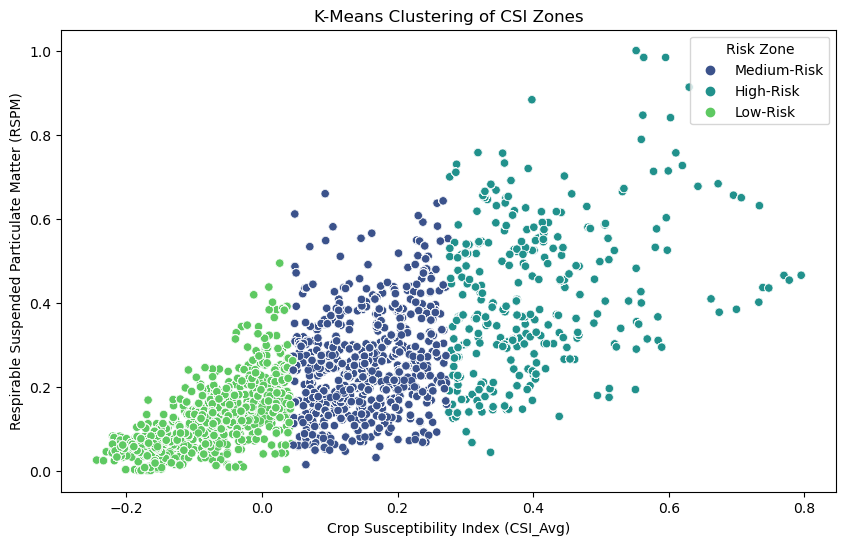

In [8]:

# Visualization of Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['CSI_Avg'], y=df['RSPM'], hue=df['Risk_Zone'], palette="viridis")
plt.title("K-Means Clustering of CSI Zones")
plt.xlabel("Crop Susceptibility Index (CSI_Avg)")
plt.ylabel("Respirable Suspended Particulate Matter (RSPM)")
plt.legend(title="Risk Zone")
plt.show()

<Figure size 1200x600 with 0 Axes>

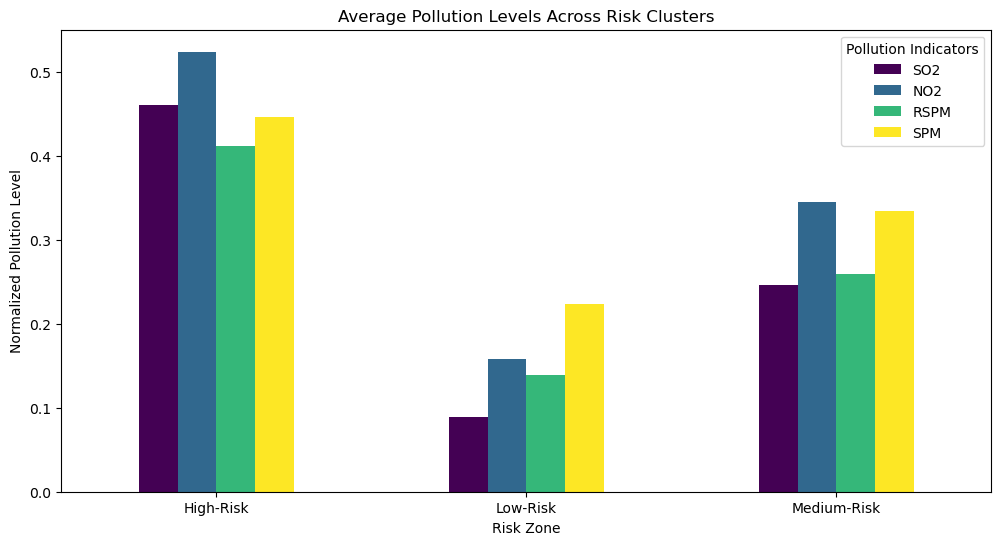

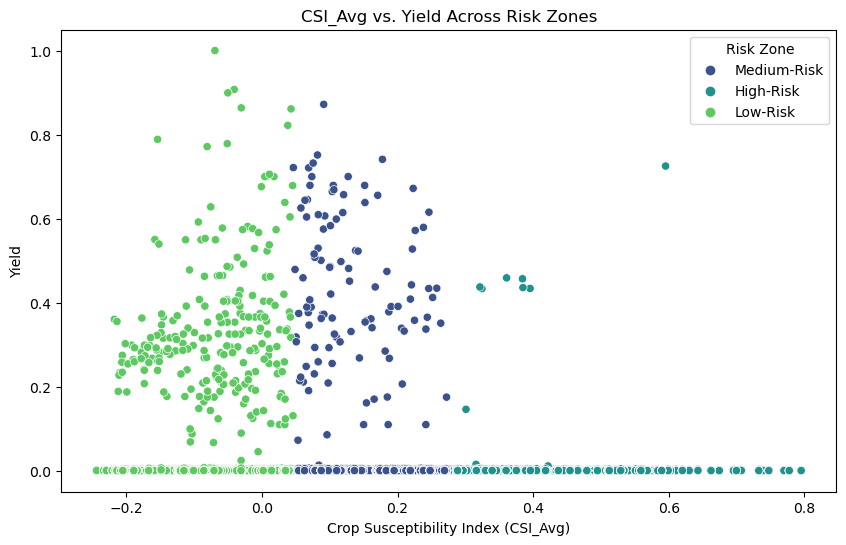

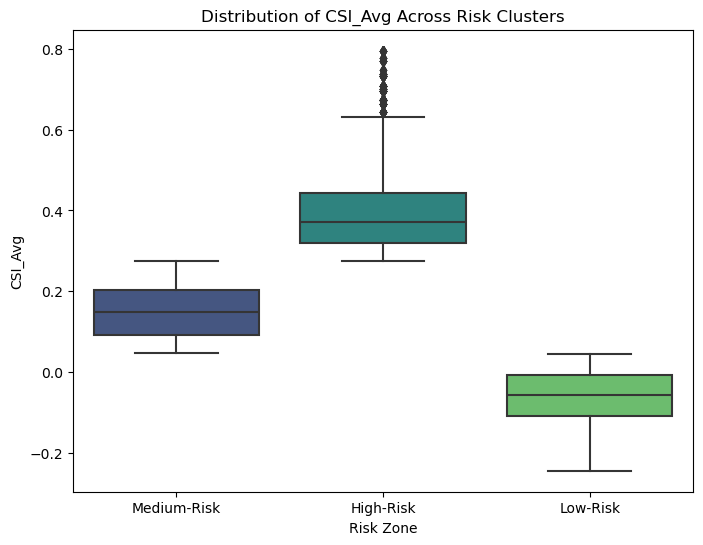

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

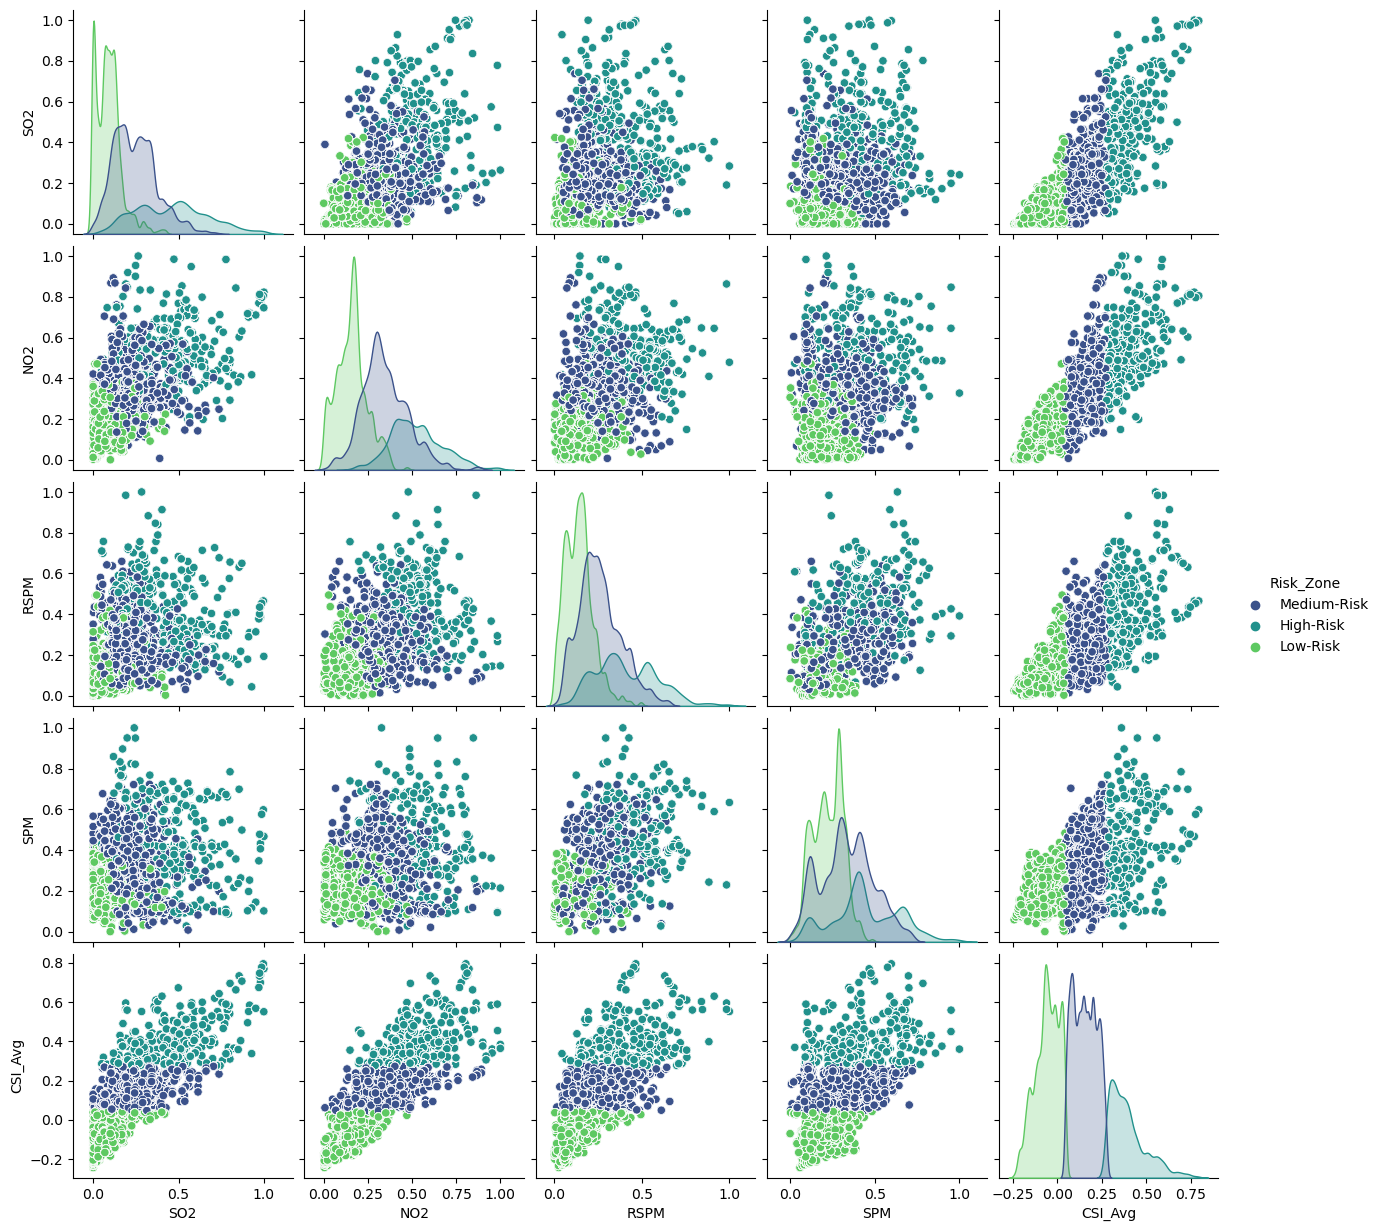

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot: Pollution Levels Across Clusters
plt.figure(figsize=(12, 6))
cluster_summary[['SO2', 'NO2', 'RSPM', 'SPM']].plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Average Pollution Levels Across Risk Clusters")
plt.xlabel("Risk Zone")
plt.ylabel("Normalized Pollution Level")
plt.xticks(rotation=0)
plt.legend(title="Pollution Indicators")
plt.show()

# Scatter Plot: CSI_Avg vs Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CSI_Avg', y='Yield', hue='Risk_Zone', palette="viridis")
plt.title("CSI_Avg vs. Yield Across Risk Zones")
plt.xlabel("Crop Susceptibility Index (CSI_Avg)")
plt.ylabel("Yield")
plt.legend(title="Risk Zone")
plt.show()

# Box Plot: CSI_Avg Distribution Across Risk Zones
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Risk_Zone", y="CSI_Avg", palette="viridis")
plt.title("Distribution of CSI_Avg Across Risk Clusters")
plt.xlabel("Risk Zone")
plt.ylabel("CSI_Avg")
plt.show()

# Pair Plot: Multi-Feature Interaction Analysis
sns.pairplot(df, vars=['SO2', 'NO2', 'RSPM', 'SPM', 'CSI_Avg'], hue="Risk_Zone", palette="viridis", diag_kind="kde")
plt.show()
